# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [130]:
# Pandas for managing datasets
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import operator
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
#Data Preparation
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
#Algorithm Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Model Training
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from time import time
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
iris = load_iris()

#convert it to panda frame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = np.array(iris.data)
Y = np.array(iris.target)

## Step 2: Define Problem
Our task is to find the best algorithm for classification of iris dataset.


## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

### 3.1 Take a peek of our data


### Does the data make sense?¶

    Do the columns make sense?
    The columns of the dataset consist of sepal length,sepal width,petal length,petal width and class.The 4 first
    columns of the dataset are general attributes of a flower,whereas the 5th attribute is what kind of flower the 4 
    columns represent.We can say that the columns do make sense.
    Do the values in columns make sense?
        As we can see,the values do make sense(no negative values and in a reange according to the perspective of each attribute(eg sepal length in cm).
    Is there missing data?
        There are no missing data on the dataset.(df.isnull().values.any() returns false)

### Dimensions of the data

Answer basic questions about the dataset:

    What is the shape of your data?
        Shape of data is 150 rows with 5 columns.150 flowers with 5 attributes.
        We can say that the we have a small number of observations.



In [80]:
for ind in range(len(iris.feature_names)):
    print iris.feature_names[ind],' has a minimum-maximum value of:',X[:,ind].min(),"-",X[:,ind].max()
print "Target variable has a minimum-maximum value of:",Y.min(),"-",Y.max()

sepal length (cm)  has a minimum-maximum value of: 4.3 - 7.9
sepal width (cm)  has a minimum-maximum value of: 2.0 - 4.4
petal length (cm)  has a minimum-maximum value of: 1.0 - 6.9
petal width (cm)  has a minimum-maximum value of: 0.1 - 2.5
Target variable has a minimum-maximum value of: 0 - 2


### Data Type of Each Attribute
Data types of the flower are numerical for the first 4 attributes,class column is categorical.



In [81]:
print 'Shape is ',df.shape
print df.dtypes
print "Are there any null values?",df.isnull().values.any()

Shape is  (150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object
Are there any null values? False



### Do we have a target variable?
Target variable is the class(target column) attribute.



In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


### 3.2 Descriptive Statistics


### describe() returns 8 statistical properties for each attribute

    Count: how many values the attribute has
    Mean: the mean of all values of the attribute
    Standard Deviation: the amount of variation values have. Low $\sigma$ means values are closer to the mean
    Minimum value
    25th Percentile: the value under which 25% of the instances can be found
    50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
    75th Percentile: the value under which 75% of the instances can be found
    Maximum value



In [84]:
pd.set_option('precision', 3)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199,1.000
std,0.828,0.434,1.764,0.763,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


### Class Distribution 

Summarise distribution of instances across classes

We can easily see that the number of flowers in each class is equally distributed.

In [85]:
df.groupby('class').size()

KeyError: 'class'

### Correlation between attributes
Correlation refers to the relationship between two variables and how they may or may not change together. A correlation of -1 or 1 shows a full negative or positive correlation respectively(correlation>0 means that if one variable increases the other also increases and correlation<0 means that when variable decreases the other also decreases). Whereas a value of 0 shows no correlation at all.
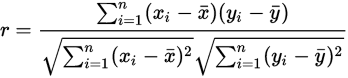
We can see from our dataset that [petal length/petal width],[petal length/sepal length],[petal length/target],[petal width/target] and [petal width/sepal length] have a high positive correllation.

In [ ]:
df.corr(method='pearson')

### Skew of Univariate Distributions
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.
 With negative skew the the mass of the distribution is concentrated on the right while with a positive skew the mass of the distribution is concentrated on the left 
We can see that petal width and petal length have negative skewness,whereas the petal length and sepal width positive skewness.


In [ ]:
df.skew()

### 3.3 Descriptive Statistics

### Summarise distributions of numeric features
We are going to use histograms.
The sepal length(mean=5.843) and sepal width(mean=3.054) the mass of the distribution is concentrated on the right,whereas the petal length(mean=3.759) and petal width(mean=1.199) the mass of the distribution is concentrated on the left.
We should note here though that the skewness is pretty close to 0,so we could also say that the distribution is pretty normal.


In [ ]:
h = df.hist()
plt.show()

### Density Plots
Sepal length and sepal width have a more normalise distribution,whereas the values of petal length and petal width are more random.


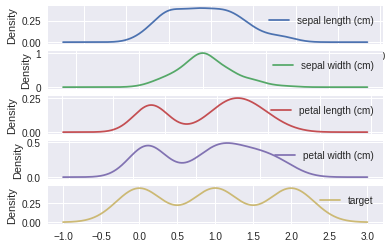

In [86]:
df.plot(kind='density', subplots=True, layout=(5,1), sharex=False)
plt.show()

### Box plots
Box plot can be summarised to the following:
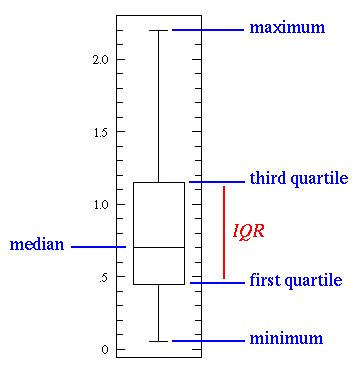

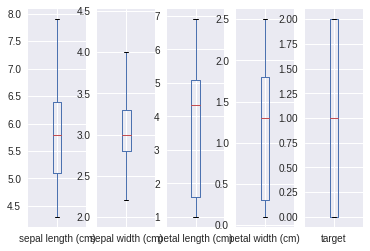

In [87]:
bp = df.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False)
plt.show()

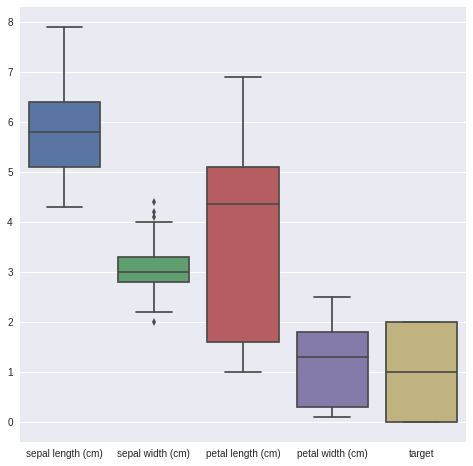

In [88]:
f = plt.figure(figsize=(8,8))
sns.boxplot(data=df)

### Correlation Matrix
The darker the box gets,the more correlated the two attributes are.

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.109              0.872   
sepal width (cm)              -0.109             1.000             -0.421   
petal length (cm)              0.872            -0.421              1.000   
petal width (cm)               0.818            -0.357              0.963   
target                         0.783            -0.419              0.949   

                   petal width (cm)  target  
sepal length (cm)             0.818   0.783  
sepal width (cm)             -0.357  -0.419  
petal length (cm)             0.963   0.949  
petal width (cm)              1.000   0.956  
target                        0.956   1.000  


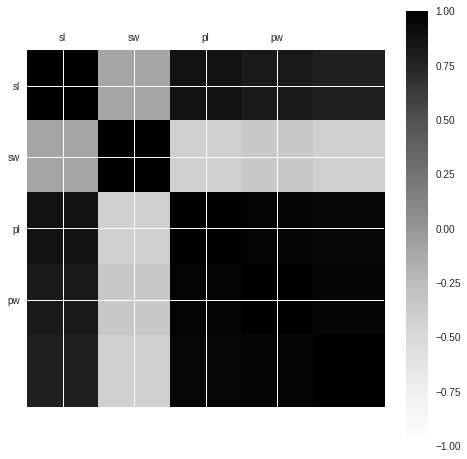

In [89]:
correlations = df.corr()
print correlations
# plot correlation matrix
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names1=['sl','sw','pl','pw','tgt']
ax.set_xticklabels(names1)
ax.set_yticklabels(names1)
plt.show()

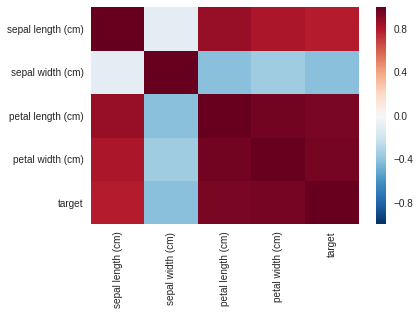

In [90]:
# In seaborn we can use a heatmap:
# Heatmap
sns.heatmap(correlations)

### Scatter plots
Scatter plots are useful for spotting structured relationships between variables, like whether you could summarise the relationship between two variables with a line.
We can see from here that the attributes for iris setosa separate this class compared to the other two variations of the flower.


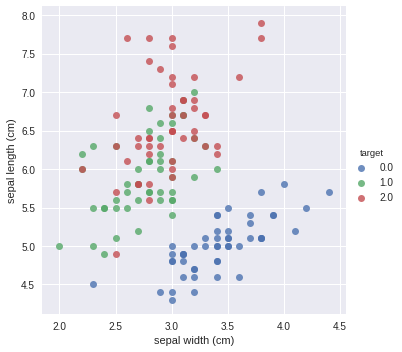

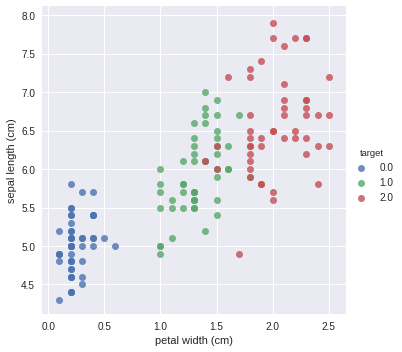

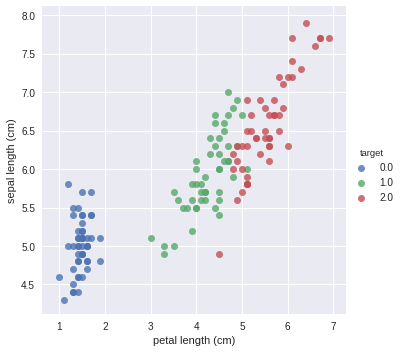

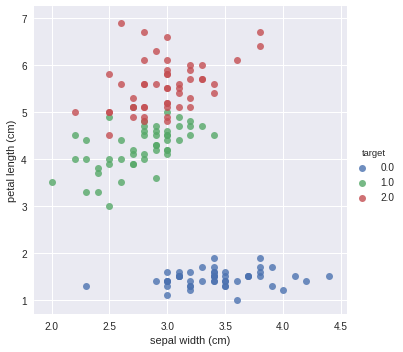

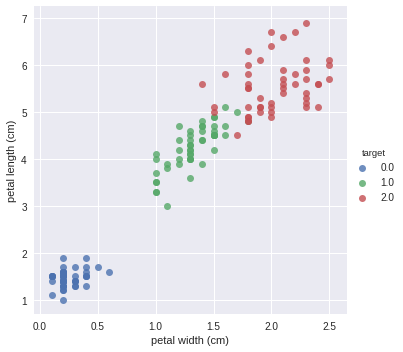

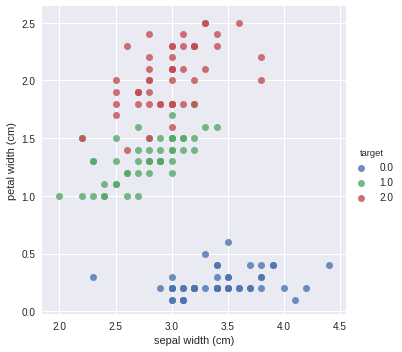

In [91]:
sns.lmplot(data=df, y='sepal length (cm)', x='sepal width (cm)', hue='target', fit_reg=False)
sns.lmplot(data=df, y='sepal length (cm)', x='petal width (cm)', hue='target', fit_reg=False)
sns.lmplot(data=df, y='sepal length (cm)', x='petal length (cm)', hue='target', fit_reg=False)
sns.lmplot(data=df, y='petal length (cm)', x='sepal width (cm)', hue='target', fit_reg=False)
sns.lmplot(data=df, y='petal length (cm)', x='petal width (cm)', hue='target', fit_reg=False)
sns.lmplot(data=df, y='petal width (cm)', x='sepal width (cm)', hue='target', fit_reg=False)

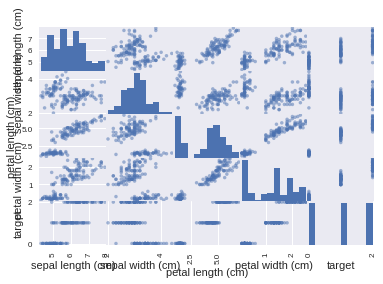

In [92]:
scatter_matrix(df)
plt.show()

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

### Rescale Data
Rescaling data is multiplying each member of a data set by a constant.The rescaled data have a value between 0 and 1.Rescaling will change the spread of your data as well as the position of your data points. What remains unchanged is the shape of distribution and the relative attributes of our curve. 

In [93]:
array = df.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(X[0:5,:])

[[ 0.222  0.625  0.068  0.042]
 [ 0.167  0.417  0.068  0.042]
 [ 0.111  0.5    0.051  0.042]
 [ 0.083  0.458  0.085  0.042]
 [ 0.194  0.667  0.068  0.042]]


### Standardise Data
A standardized value is what you get when you take a data point and scale it by population data.

In [94]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(X[0:5,:])

[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]


### Normalise Data (length = 1)

In [95]:
scaler = Normalizer().fit(X)
X = Normalizer().transform(X)
# summarise transformed data
print(X[0:5,:])

[[-0.388  0.444 -0.577 -0.565]
 [-0.519 -0.057 -0.609 -0.596]
 [-0.58   0.141 -0.585 -0.549]
 [-0.634  0.045 -0.54  -0.552]
 [-0.412  0.509 -0.54  -0.529]]


## Step 5: Feature Engineering

A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model. The purpose of a feature, other than being an attribute, would be much easier to understand in the context of a problem. A feature is a characteristic that might help when solving the problem. The features in our data are important to the predictive models you use and will influence the results we are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not.You could say the better the features are, the better the result is. This isn't entirely true, because the results achieved also depend on the model and the data, not just the chosen features. That said, choosing the right features is still very important. Better features can produce simpler and more flexible models, and they often yield better results

## Step 6: Algorithm Selection
Below we execute a number of algorithms and print their mean estimated accuracy.

### 6.1 Algorithm Selection
K-Folds cross-validator.
Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

In [96]:
kfold = KFold(n_splits=10, random_state=7)

### Logistic Regression

In [97]:
results = cross_val_score(LogisticRegression(), X, Y, cv=kfold)
print(results.mean()) ;# prints the mean estimated accuracy

0.753333333333


### Linear Discriminant Analysis

In [98]:
results = cross_val_score(LinearDiscriminantAnalysis(), X, Y, cv=kfold)
print(results.mean())

0.826666666667


### KNNeighbors Classifier

In [99]:
results = cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold)
print results.mean()

0.833333333333


### Naive Bayes

In [100]:
results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print(results.mean())

0.873333333333



### Decision Trees

In [101]:
results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=kfold)
print(results.mean())

0.786666666667


### Support Vector Machines

In [102]:
results = cross_val_score(SVC(), X, Y, cv=kfold)
print(results.mean())

0.806666666667


### 6.2 Algorithm Comparison


We are going to compare a set of algorithms:

    Logistic Regression
    Linear Discriminant Analysis
    k-Nearest Neighbors
    Decision Trees
    Naive Bayes
    Support Vector Machines



In [103]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models1 = {}
models1["LR"]=LogisticRegression()
models1["LDA"]=LinearDiscriminantAnalysis()
models1["kNN"]=KNeighborsClassifier()
models1["DT"]=DecisionTreeClassifier()
models1["NB"]=GaussianNB()
models1["SVC"]=SVC()

The scoring function to use:

In [104]:
scoring = 'accuracy'

We are going to evaluate all classifiers using kfold and scoring accuracy and store results in two lists:

In [105]:
results = []
names   = []
x,x_test,y,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
kfold = KFold(n_splits=10, random_state=7)
for ind, name in enumerate(models1):
  cv_results = cross_val_score(models1[name], x, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

       kNN: 0.900000 (+/- 0.072648)
       LDA: 0.866667 (+/- 0.055277)
        NB: 0.891667 (+/- 0.075000)
       SVC: 0.858333 (+/- 0.065085)
        LR: 0.833333 (+/- 0.111803)
        DT: 0.841667 (+/- 0.078617)


### Lets plot results

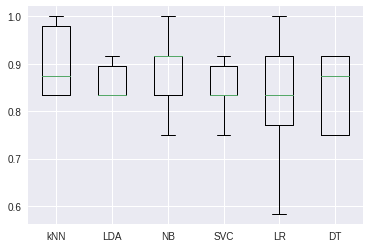

In [106]:
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

### Python scikit-learn provides a simple method for algorithm parameter tuning:
Grid Search


In [107]:
x,x_test,y,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
models={}
kfold = KFold(n_splits=10, random_state=7)
mean_scores={}
scores={}
algos={}

### Decision Tree Classifier with parameter tuning
<h4>max_features</h4>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
<h4>splitter</h4>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
<h4>max_depth</h4>
The maximum depth of the tree


In [108]:
parameters = {'criterion': ['gini','entropy'],
          'splitter': ['best','random'], 
          'max_depth':[1,2,3]}

Create and fit a decision tree classifier model, testing each parameter:

In [109]:
model=DecisionTreeClassifier()
models["DT"] = GridSearchCV(model, param_grid=parameters)
#Learning
models["DT"].fit(x,y)
algos["DT"] = DecisionTreeClassifier(criterion=models["DT"].best_params_["criterion"],
                             splitter=models["DT"].best_params_["splitter"],
                                     max_depth=models["DT"].best_params_["max_depth"])
scores["DT"] = cross_val_score(algos["DT"], x, y, cv=kfold, scoring=scoring)
mean_scores["DT"]=scores["DT"].mean()
print scores["DT"]
print mean_scores["DT"]


[ 0.75   0.833  0.75   0.75   1.     0.833  1.     0.75   0.833  0.833]
0.833333333333


### Logistic Regression with parameter tuning
<h4>solver_options</h4>
default: ‘liblinear’ Algorithm to use in the optimization problem.
    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and
        ‘saga’ are faster for large ones.
    For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
        handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas
        ‘liblinear’ and ‘saga’ handle L1 penalty.
<h4>multi_class_options</h4>
Multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution
<h4>class_weight_options</h4>
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.


In [110]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr']
class_weight_options = [None,'balanced']

parameters = dict(solver = solver_options, multi_class = 
multi_class_options, class_weight = class_weight_options)

In [111]:
model=LogisticRegression()
models["LR"] = GridSearchCV(model, param_grid=parameters)
#Learning
models["LR"].fit(x,y)
print("Best Hyper Parameters:",models["LR"].best_params_)
algos["LR"] = LogisticRegression(solver=models["LR"].best_params_["solver"],
                             multi_class=models["LR"].best_params_["multi_class"],
                             class_weight=models["LR"].best_params_["class_weight"])
scores["LR"] = cross_val_score(algos["LR"], x, y, cv=kfold, scoring=scoring)
mean_scores["LR"]=scores["LR"].mean()
print scores["LR"]
print mean_scores["LR"]

('Best Hyper Parameters:', {'multi_class': 'ovr', 'solver': 'newton-cg', 'class_weight': None})
[ 0.75   0.75   0.583  0.833  1.     0.917  0.833  0.917  0.917  0.833]
0.833333333333


### Linear Discriminant Analysis with parameter tuning
<h4>solver</h4>
Solver to use, possible values:
    ‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
    ‘lsqr’: Least squares solution, can be combined with shrinkage.
    ‘eigen’: Eigenvalue decomposition, can be combined with shrinkage.
<h4>n_components</h4>
Number of components (< n_classes - 1) for dimensionality reduction.


In [112]:
 parameters = {'solver' : ['svd','lsqr' ,'eigen'],
        'n_components' : [2,3,4,5,6,7,8,9,10,11,12,]}

In [113]:
model=LinearDiscriminantAnalysis()
models["LDA"] = GridSearchCV(model, param_grid=parameters)
#Learning
models["LDA"].fit(x,y)
print("Best Hyper Parameters:",models["LDA"].best_params_)
algos["LDA"] = LinearDiscriminantAnalysis(solver=models["LDA"].best_params_["solver"],
                             n_components=models["LDA"].best_params_["n_components"])
scores["LDA"] = cross_val_score(algos["LDA"], x, y, cv=kfold, scoring=scoring)
mean_scores["LDA"]=scores["LDA"].mean()
print scores["LDA"]
print mean_scores["LDA"]


('Best Hyper Parameters:', {'n_components': 2, 'solver': 'svd'})
[ 0.833  0.833  0.833  0.833  1.     0.917  0.833  0.917  0.833  0.833]
0.866666666667


### KNeighborsClassifier with parameter tuning
<h4>n_neighbors</h4>
Number of neighbors to use by default for kneighbors queries.
<h4>weights</h4>
weight function used in prediction. Possible values:
        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.





In [114]:
neighbors = np.arange(10)+1
parameters = {'n_neighbors': neighbors,
             'weights':['uniform', 'distance']}

In [115]:
model=KNeighborsClassifier()
models["kNN"] = GridSearchCV(model, param_grid=parameters)
#Learning
models["kNN"].fit(x,y)
algos["kNN"] = KNeighborsClassifier(n_neighbors=models["kNN"].best_params_['n_neighbors'],
                          weights=models["kNN"].best_params_['weights'])
scores["kNN"] = cross_val_score(algos["kNN"], x, y, cv=kfold, scoring=scoring)
mean_scores["kNN"]=scores["kNN"].mean()
print scores["kNN"]
print mean_scores["kNN"]

[ 0.833  0.833  0.75   0.917  1.     0.917  1.     1.     0.833  0.917]
0.9


### GaussianNB with parameter tuning
<h4>priors</h4>
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [116]:
priors = [[0.2,0.3,0.5],[0.3,0.5,0.2],[0.3,0.4,0.3],[0.33,0.33,0.34]]
parameters = dict(priors = priors)

In [117]:
model=GaussianNB()

models["NB"] = GridSearchCV(model, param_grid = parameters)
models["NB"].fit(x,y)
algos["NB"] = GaussianNB(priors=models["NB"].best_params_['priors'])
scores["NB"] = cross_val_score(algos["NB"], x, y, cv=kfold, scoring=scoring)
mean_scores["NB"]=scores["NB"].mean()
print scores["NB"]
print mean_scores["NB"]

[ 0.833  0.833  0.833  0.75   1.     1.     0.917  1.     0.917  0.917]
0.9


### Support Vector Machines with parameter tuning
<h4>C</h4>
Penalty parameter C of the error term.
<h4>kernel</h4>
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’.

In [118]:
parameters = {
    'C':            [1,2,3,4,5,6,7,8,9],
    'kernel':       ['linear', 'rbf',"sigmoid"]}

In [119]:
model=SVC()

models["SVC"] = GridSearchCV(model, param_grid = parameters)
models["SVC"].fit(x,y)
algos["SVC"] = SVC(C=models["SVC"].best_params_['C'],
                         kernel=models["SVC"].best_params_['kernel'])
scores["SVC"] = cross_val_score(algos["SVC"], x, y, cv=kfold, scoring=scoring)
mean_scores["SVC"]=scores["SVC"].mean()
print scores["SVC"]
print mean_scores["SVC"]

[ 0.833  0.833  0.75   0.833  1.     0.833  0.833  0.917  0.833  0.833]
0.85


In [127]:
sorted_acc = sorted(mean_scores.items(), key=operator.itemgetter(1))
print "Best algorithm with accuracy",sorted_acc[len(sorted_acc)-1]

Best algorithm with accuracy ('kNN', 0.90000000000000002)


## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [128]:
algos[sorted_acc[len(sorted_acc)-1][0]].fit(x,y)
predictions=algos[sorted_acc[len(sorted_acc)-1][0]].predict(x_test)
models1[sorted_acc[len(sorted_acc)-1][0]].fit(x,y)
accuracy_after = cross_val_score(algos[sorted_acc[len(sorted_acc)-1][0]], x_test, y_test, cv=kfold, scoring=scoring).mean()
accuracy_before = cross_val_score(models1[sorted_acc[len(sorted_acc)-1][0]], x_test, y_test, cv=kfold, scoring=scoring).mean()

print "accuracy after hyperparameter tuning=",accuracy_after
print "accuracy before tuning=",accuracy_before
if accuracy_before-accuracy_after<=0:
    print "Improvement:",(accuracy_after-accuracy_before)
else:
    print 'Default values were better.'

accuracy after hyperparameter tuning= 0.733333333333
accuracy before tuning= 0.733333333333
Improvement: 0.0


## Step 9: Confusion Matrix

Confusion matrix is metric of accuracy. The diagonal elements at the confusion matrix are the number of data that the best algorithm correctly predicted the target, while the rest are those that are not classified correctly. 

In [129]:
print "\nconfusion_matrix:\n",(confusion_matrix(y_test, predictions))


confusion_matrix:
[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]


## Classification Report

Clasification Report is also a metric for the classification model.
    tp:number of true positives
    fp:number of false positives
    fn:number of false negatives
    precision:tp / (tp + fp) and measures the ability of the algorithm not to classify positively a label that is negative
    recall:ratio tp / (tp + fn) and measures the ability of the algorithm to find all the positive samples

In [132]:
print "\nclassification_report:\n", (classification_report(y_test, predictions))


classification_report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       0.89      0.62      0.73        13
        2.0       0.50      0.83      0.62         6

avg / total       0.85      0.80      0.81        30

